In [1]:
## import data handling and manipulation libraries

import pandas as pd
import numpy as np

##Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci

## import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Problem Statement

- This is a bank dataset, where will need to prepare ML to classify if cust will take perform loan ot not. 
- Taget variable: Personal Loan, which already has been ecoded with 0 means no and 1 means yes. 
- It is supervised - Classified Dataset.
- Encoding already performed on this dataset

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
df.shape

(5000, 14)

In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [12]:
df.kurt()

ID                     -1.200000
Age                    -1.153067
Experience             -1.121523
Income                 -0.044244
ZIP Code              486.204272
Family                 -1.403586
CCAvg                   2.646706
Education              -1.546116
Mortgage                4.756797
Personal Loan           5.529589
Securities Account      4.701013
CD Account             11.633404
Online                 -1.844883
CreditCard             -1.182191
dtype: float64

<Axes: >

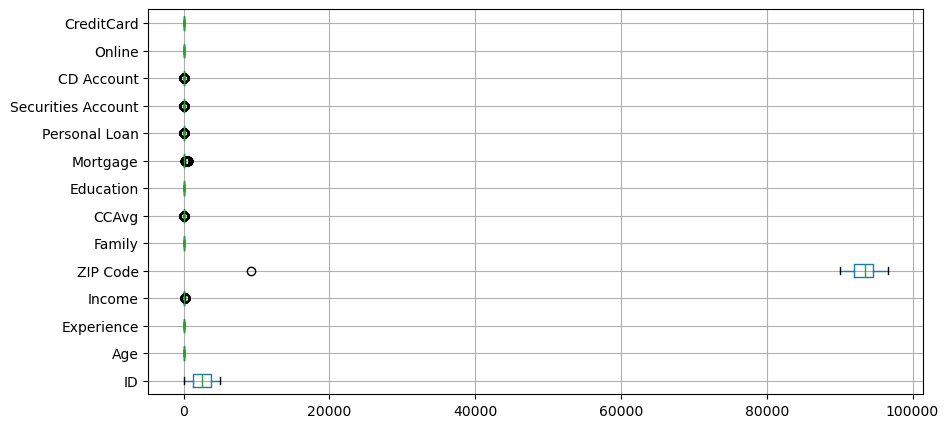

In [13]:
plt.figure(figsize = (10,5))
df.boxplot(vert = False)

<Axes: xlabel='Age', ylabel='Density'>

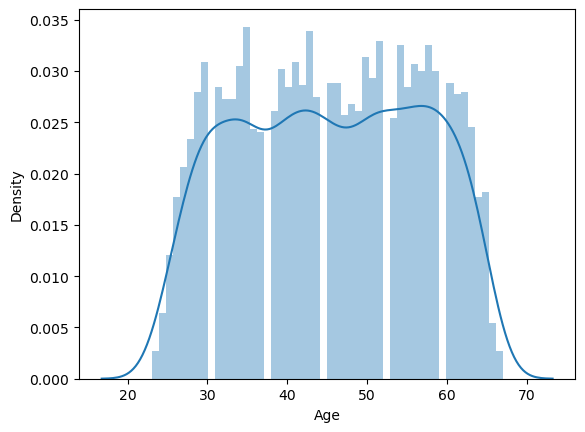

In [14]:
sns.distplot(df['Age'], bins = 50)

<Axes: >

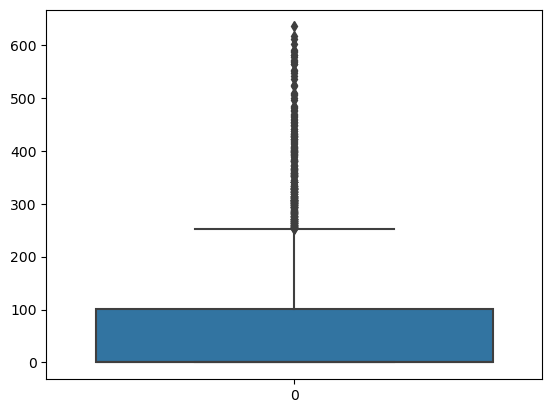

In [15]:
sns.boxplot(df['Mortgage'])

In [16]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<Axes: xlabel='Education', ylabel='Density'>

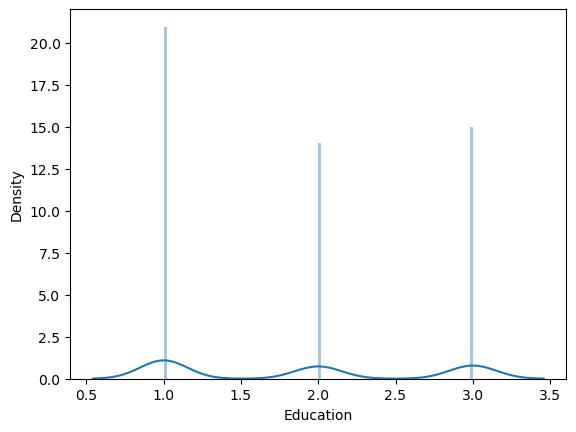

In [17]:
sns.distplot(df['Education'], bins = 100)

In [18]:
df.drop('ID', axis = 1, inplace = True)

In [19]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [20]:
df.Online.value_counts()

Online
1    2984
0    2016
Name: count, dtype: int64

In [21]:
df.CreditCard.value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [22]:
df.Family.value_counts()

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

In [23]:
df.drop(['ZIP Code', 'Education', 'Family'], axis = 1, inplace = True)

In [24]:
df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,1.6,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0
4,35,8,45,1.0,0,0,0,0,0,1


In [25]:
df.CCAvg.value_counts()

CCAvg
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
3.25      1
3.67      1
4.67      1
8.90      1
2.75      1
Name: count, Length: 108, dtype: int64

In [26]:
pd.set_option('display.max_rows', 20) #To show all rows

In [27]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.29,0.46,0.0,0.0,0.0,1.0,1.0


In [28]:
df[df['Experience'] < 0]

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,2.30,0,0,0,0,0,1
226,24,-1,39,1.70,0,0,0,0,0,0
315,24,-2,51,0.30,0,0,0,0,1,0
451,28,-2,48,1.75,89,0,0,0,1,0
524,24,-1,75,0.20,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4411,23,-2,75,1.80,0,0,0,0,1,1
4481,25,-2,35,1.00,0,0,0,0,1,0
4514,24,-3,41,1.00,0,0,0,0,1,0
4582,25,-1,69,0.30,0,0,0,0,1,0


In [29]:
##convert above 52 rows to positive value

df[df['Experience'] <0] = df[df['Experience'] < 0].abs()
df

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,1.6,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0
4,35,8,45,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,1,0
4996,30,4,15,0.4,85,0,0,0,1,0
4997,63,39,24,0.3,0,0,0,0,0,0
4998,65,40,49,0.5,0,0,0,0,1,0


In [30]:
##conver annual income to monthly with divide by 12

df['Income'] = round(df['Income']/12,2)
df

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,1.6,0,0,1,0,0,0
1,45,19,2.83,1.5,0,0,1,0,0,0
2,39,15,0.92,1.0,0,0,0,0,0,0
3,35,9,8.33,2.7,0,0,0,0,0,0
4,35,8,3.75,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,1.9,0,0,0,0,1,0
4996,30,4,1.25,0.4,85,0,0,0,1,0
4997,63,39,2.00,0.3,0,0,0,0,0,0
4998,65,40,4.08,0.5,0,0,0,0,1,0


In [31]:
df.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.049738,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,0.645972,0.206785,0.502464,-0.002616,0.169724,0.014188,-0.002386
CCAvg,-0.052012,-0.049738,0.645972,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Mortgage,-0.012539,-0.011097,0.206785,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502464,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169724,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014051,0.014188,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,0.008851,-0.002386,-0.006689,-0.007231,0.002802,-0.015028,0.278644,0.004210,1.000000


In [32]:
corr = df.corr()

In [33]:
corr

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.049738,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,0.645972,0.206785,0.502464,-0.002616,0.169724,0.014188,-0.002386
CCAvg,-0.052012,-0.049738,0.645972,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Mortgage,-0.012539,-0.011097,0.206785,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502464,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169724,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014051,0.014188,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,0.008851,-0.002386,-0.006689,-0.007231,0.002802,-0.015028,0.278644,0.004210,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

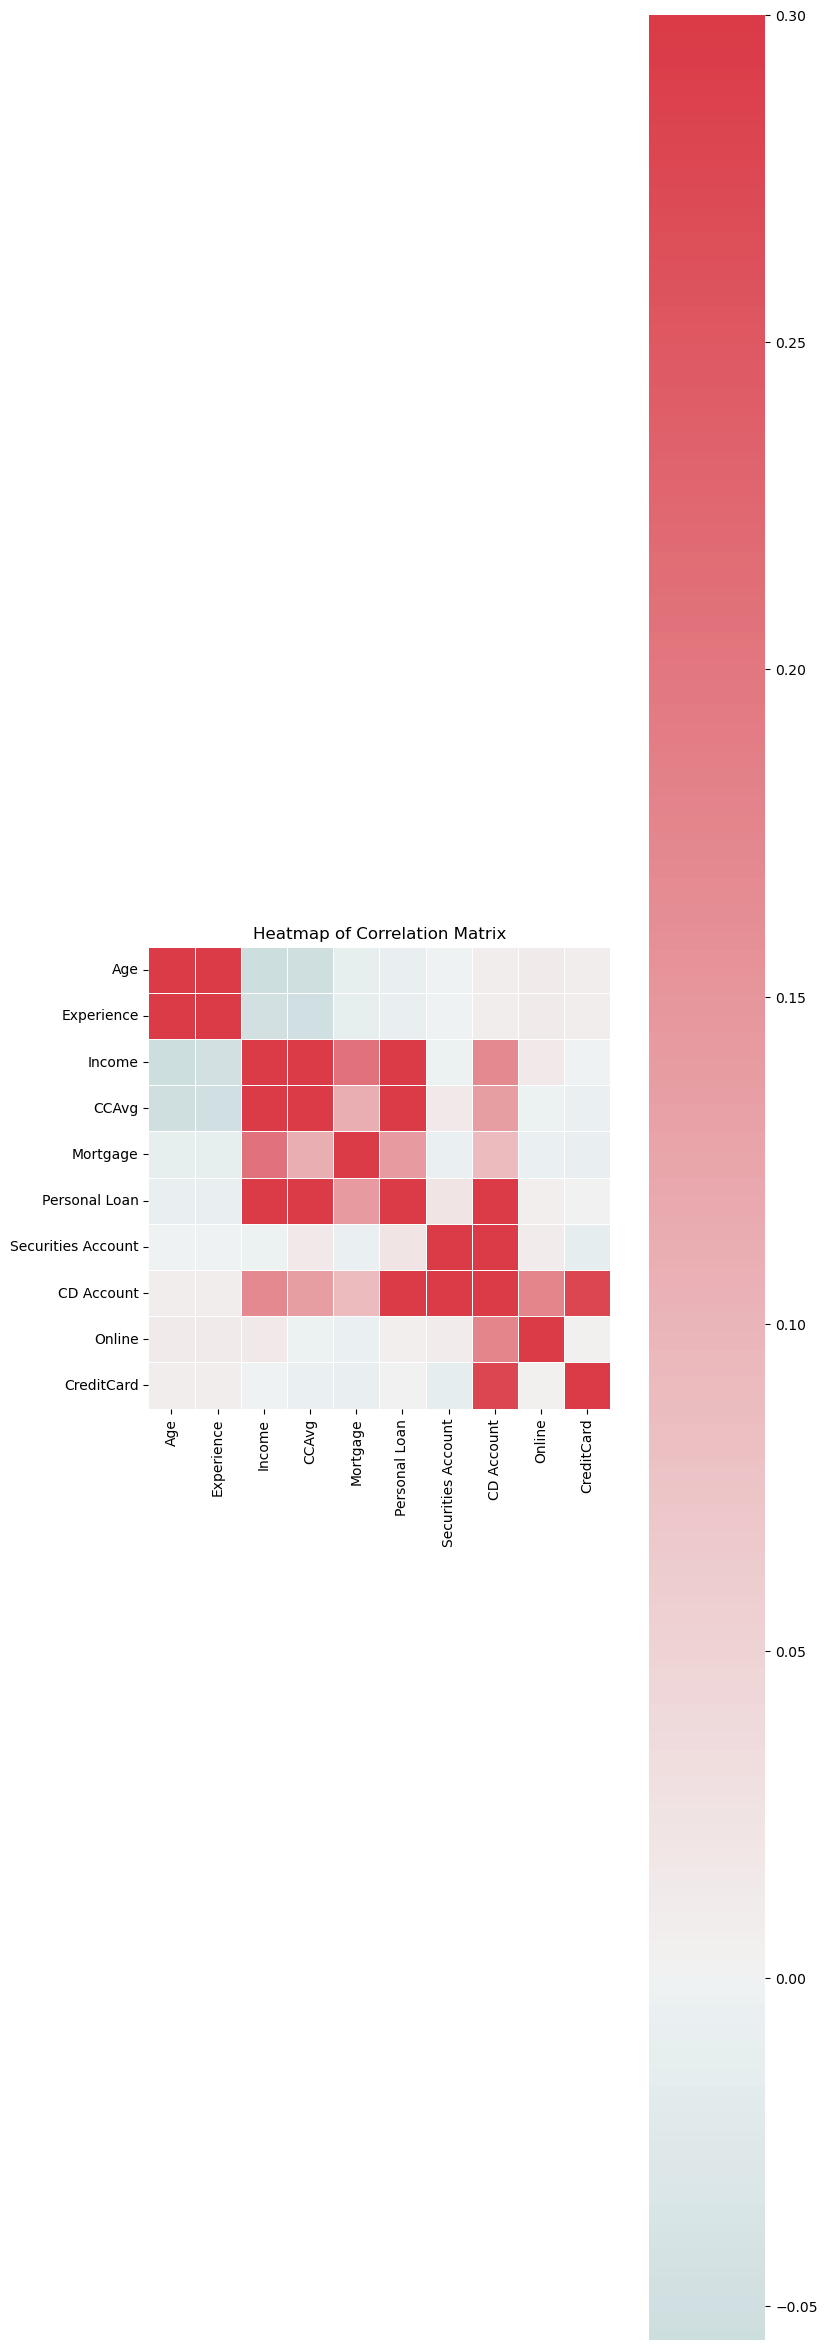

In [34]:
plt.figure(figsize = (10,6))
cmap = sns.diverging_palette(200,10, as_cmap = True)
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap = cmap,
           vmax = .3, center = 0, square = True, linewidths = 0.5, cbar_kws = {'shrink' : 82})
plt.title('Heatmap of Correlation Matrix')

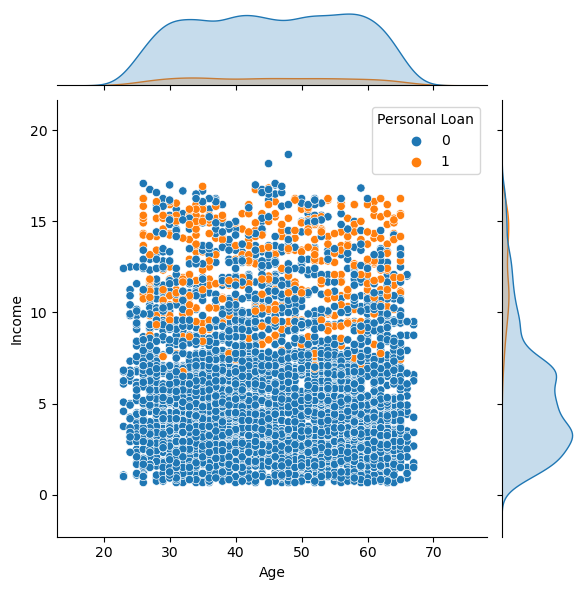

In [35]:
sns.jointplot(data = df, x = 'Age', y = 'Income', hue = 'Personal Loan')

<Axes: xlabel='Personal Loan', ylabel='count'>

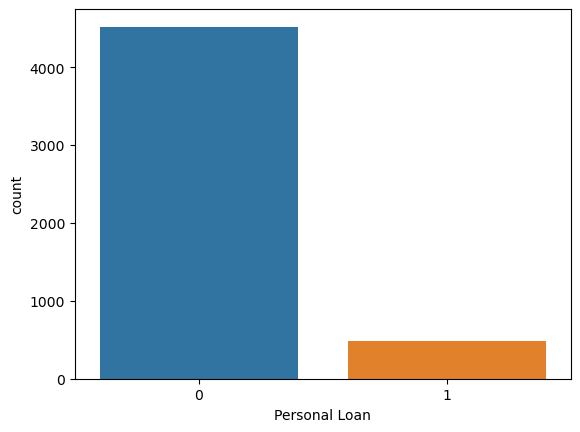

In [36]:
sns.countplot(x = 'Personal Loan', data = df)

<Axes: xlabel='Personal Loan', ylabel='Count'>

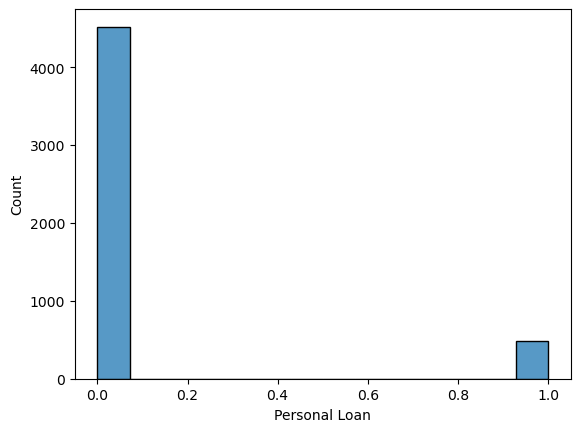

In [37]:
sns.histplot(x = 'Personal Loan', data = df)

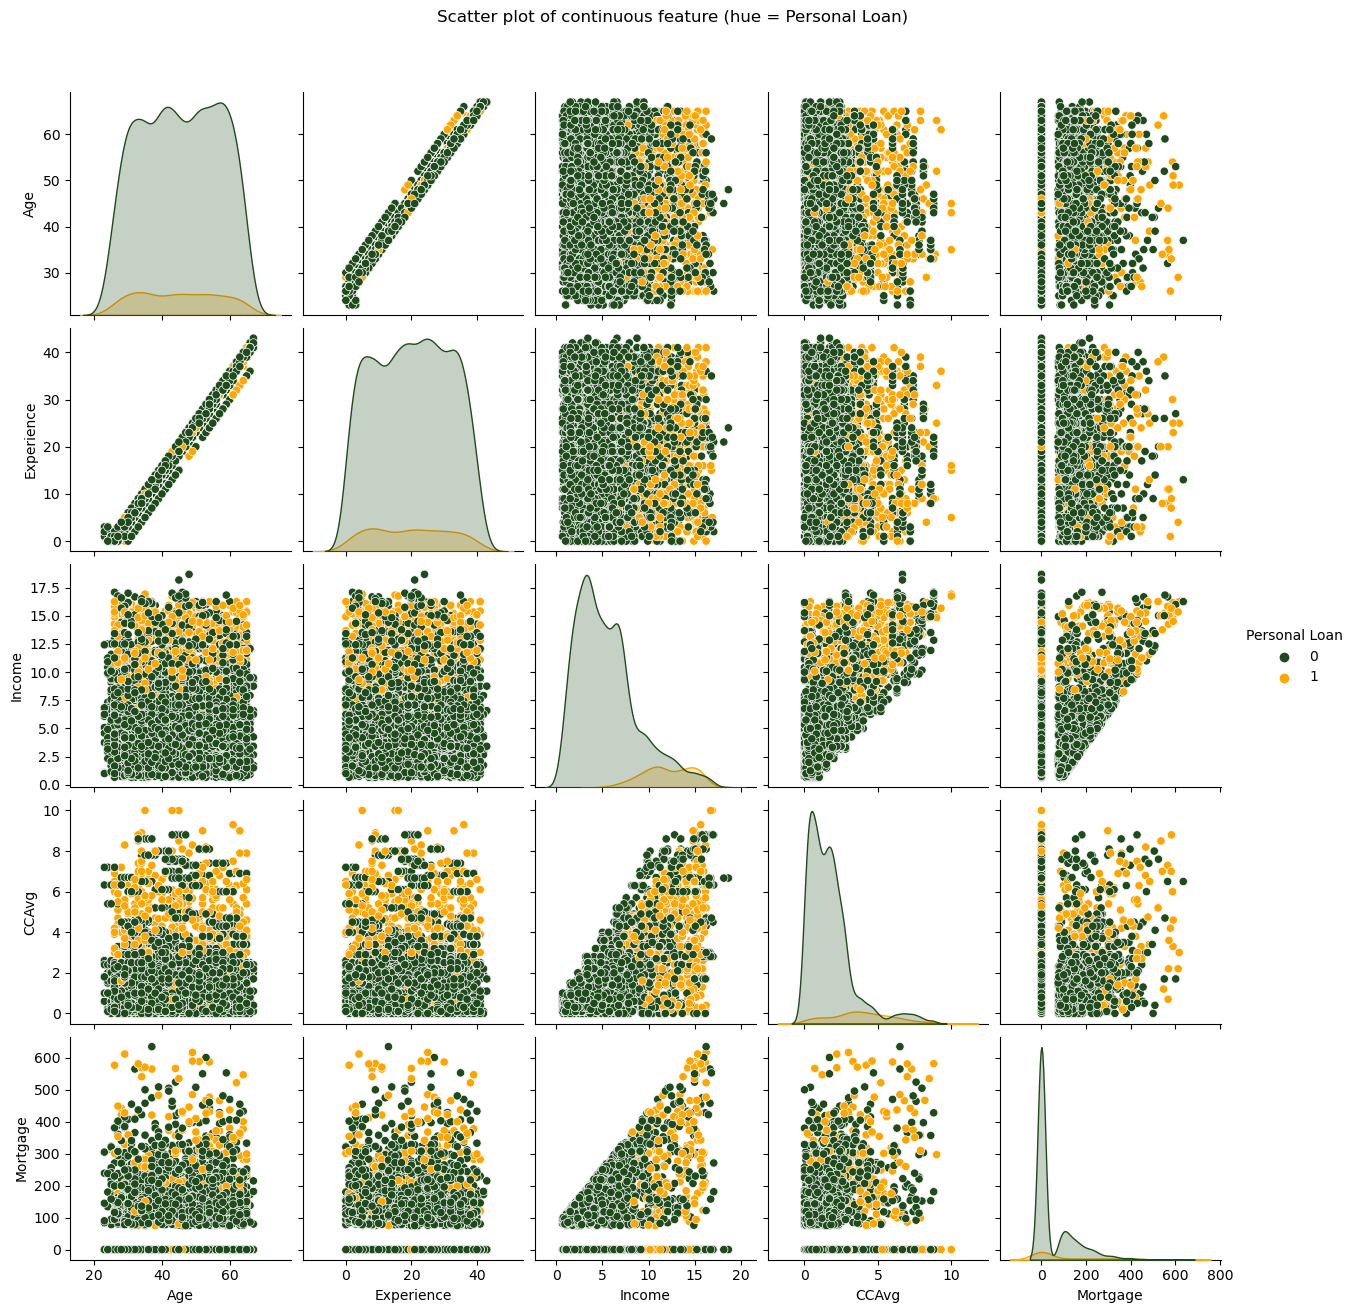

In [38]:
##Draw pairplot with hue = Personal Loan

sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
splot = sns.pairplot(data=df, x_vars=['Age','Experience','Income','CCAvg','Mortgage'], y_vars=['Age','Experience','Income','CCAvg','Mortgage'], hue='Personal Loan')
splot.fig.suptitle('Scatter plot of continuous feature (hue = Personal Loan)', y=1.05)
plt.show()

In [39]:
## Data scaling, standardization..

from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(df.drop('Personal Loan', axis = 1))

StandardScaler()

In [42]:
## while perfornming scaling, have first trop target variable (personal loan), post which will perform scaling

In [43]:
scaled_df = scaler.transform(df.drop('Personal Loan', axis = 1))

In [44]:
scaled_df

array([[-1.77441684, -1.67640794, -0.53910147, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09940383, -0.86497454, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44984918, -1.36290859, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.65282296, -1.08135426, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.7404343 , -0.53910147, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.41357392,  0.20128215, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [45]:
df[:-1]

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,1.6,0,0,1,0,0,0
1,45,19,2.83,1.5,0,0,1,0,0,0
2,39,15,0.92,1.0,0,0,0,0,0,0
3,35,9,8.33,2.7,0,0,0,0,0,0
4,35,8,3.75,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4994,64,40,6.25,2.0,0,0,0,0,1,0
4995,29,3,3.33,1.9,0,0,0,0,1,0
4996,30,4,1.25,0.4,85,0,0,0,1,0
4997,63,39,2.00,0.3,0,0,0,0,0,0


In [46]:
scaled_df = pd.DataFrame(data = scaled_df, columns = df.columns[:-1])

In [47]:
scaled_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.676408,-0.539101,-0.193385,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.099404,-0.864975,-0.250611,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.449849,-1.362909,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.975517,0.568867,0.436091,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.063129,-0.625132,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


In [48]:
## Multicollinearity teat

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending = False)
    return vif

In [51]:
calculate_vif(df.drop('Personal Loan', axis =1))

,features,VIF_Values
0,Age,30.93
1,Experience,18.25
2,Income,6.33
3,CCAvg,3.84
7,Online,2.57
8,CreditCard,1.56
6,CD Account,1.41
4,Mortgage,1.38
5,Securities Account,1.27


In [52]:
## Correlation with the Target variables/feature

def correlation_with_target(data, t_col):
    independent_variable = data.drop(t_col, axis = 1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable, corr_result], index = ['Independent Variables', 'correlation']).T
    return result.sort_values('correlation', ascending = False)

In [53]:
correlation_with_target(df, 'Personal Loan')

,Independent Variables,correlation
2,Income,0.502464
3,CCAvg,0.366889
6,CD Account,0.316355
4,Mortgage,0.142095
5,Securities Account,0.021954
7,Online,0.006278
8,CreditCard,0.002802
0,Age,-0.007726
1,Experience,-0.008304


## Analysis

- Income has highest correlationship with with Personal loan, 50% 
- And CCAVG and CD Account has 36% and 31% correlation with PL.

In [54]:
def custom_PCA(X):
    n_comp = len(X.columns)
    for i in range(1,n_comp):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained Variance ratio after PCA is:', evr)
    
    #Creating a dataframe of Principle components
    col = []
    for j in range(1, pcs+1):
        col.append('PC_' + str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df

In [55]:
pca_df = custom_PCA(scaled_df)

Explained Variance ratio after PCA is: [0.22585245 0.4239492  0.57663712 0.68948355 0.79934261 0.90357151]


In [56]:
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,2.089912,-1.254614,1.144557,2.133729,2.091403,-0.440283
1,-0.187167,-0.632362,1.024042,2.152333,2.135673,-0.413663
2,0.103007,-1.814586,-0.234964,0.145604,0.878543,-0.159914
3,1.392975,-0.427766,-1.010524,0.134020,0.818964,-0.709507
4,0.935817,-1.353801,0.540911,-1.569512,1.142475,-0.401123


In [57]:
df.shape

(5000, 10)

## Model Building

- Stage of Model Building

In [58]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
##Created function for model builder

def model_builder(model_name, score, X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
    model = model_name()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)

    #stratified k fold
    cv_score = np.mean(cross_val_score(estimator = model, X = X, y = y, cv = 10))
    return accuracy, cv_score

In [61]:
model_builder(LogisticRegression, accuracy_score, X,y)

(0.918, 0.9208000000000001)

In [62]:
model_builder(DecisionTreeClassifier, accuracy_score, X, y)

(0.931, 0.9214)

In [63]:
model_builder(KNeighborsClassifier, accuracy_score, X,y)

(0.908, 0.9116)

In [64]:
model_builder(GradientBoostingClassifier, accuracy_score, X,y)

(0.927, 0.9332)

In [65]:
model_builder(AdaBoostClassifier, accuracy_score, X,y)

(0.928, 0.9258000000000001)

In [66]:
model_builder(RandomForestClassifier, accuracy_score, X,y)

(0.937, 0.9358000000000001)

In [67]:
model_builder(XGBClassifier, accuracy_score, X,y)

(0.932, 0.9426)

In [68]:
model_builder(GaussianNB, accuracy_score, X,y)

(0.882, 0.8762000000000001)

In [69]:
## Hyperparameter Turning gridsearch CV

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
dtc = DecisionTreeClassifier()

In [72]:
param = {'min_weight_fraction_leaf' : [0.1, 0.3, 0.5],
        'max_features' : [1,5,7,89,76,55], 
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'splitter' : ['best', 'random'],
        'max_depth' : [1,2,4,5,6,7,8,28,79,16],
        'min_samples_split' : [0.1, 0.2, 0.3, 0.4, 0.5, 10, 12,14,15,16]}

In [73]:
gcv = GridSearchCV(estimator = dtc, param_grid = param, cv = 5)

In [74]:
gcv.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 4, 5, 6, 7, 8, 28, 79, 16],
                         'max_features': [1, 5, 7, 89, 76, 55],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 10, 12,
                                               14, 15, 16],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5],
                         'splitter': ['best', 'random']})